In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
admissions=pd.read_csv("d://python/sklearn/admissions.csv")
model=LogisticRegression()
model.fit(admissions[["gpa"]],admissions["admit"])

labels=model.predict(admissions[["gpa"]])
admissions["predicted_label"]=labels
print(admissions["predicted_label"].value_counts())
print(admissions.head())

0    598
1     46
Name: predicted_label, dtype: int64
   admit       gpa         gre  predicted_label
0      0  3.177277  594.102992                0
1      0  3.412655  631.528607                0
2      0  2.728097  553.714399                0
3      0  3.093559  551.089985                0
4      0  3.141923  537.184894                0


d:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [2]:
admissions["actual_label"]=admissions["admit"]
matches=admissions["predicted_label"]==admissions["actual_label"]
correct_predictions=admissions[matches]
print(correct_predictions.head())
accuracy=len(correct_predictions)/float(len(admissions))
print(accuracy)

   admit       gpa         gre  predicted_label  actual_label
0      0  3.177277  594.102992                0             0
1      0  3.412655  631.528607                0             0
2      0  2.728097  553.714399                0             0
3      0  3.093559  551.089985                0             0
4      0  3.141923  537.184894                0             0
0.6459627329192547


In [5]:
true_positive_filter=(admissions["predicted_label"]==1)&(admissions["actual_label"]==1)
true_positives=len(admissions[true_positive_filter])
true_negative_filter=(admissions["predicted_label"]==0)&(admissions["actual_label"]==0)
true_negatives=len(admissions[true_negative_filter])

print(true_positives)
print(true_negatives)

31
385


In [9]:
false_negative_filter=(admissions["predicted_label"]==0)&(admissions["actual_label"]==1)
false_negatives=len(admissions[false_negative_filter])
sensitivity=true_positives/float((true_positives+false_negatives))
print(sensitivity)

0.12704918032786885


In [10]:
false_positive_filter=(admissions["predicted_label"]==1)&(admissions["actual_label"]==0)
false_positives=len(admissions[false_positive_filter])
specificity=(true_negatives)/float((false_positives+true_negatives))
print(specificity)

0.9625


In [11]:
import numpy as np
np.random.seed(8)
admissions=admissions.drop("admit",axis=1)
shuffled_index=np.random.permutation(admissions.index)
shuffled_admissions=admissions.loc[shuffled_index]
train=shuffled_admissions.iloc[0:515]
test=shuffled_admissions.iloc[515:len(shuffled_admissions)]
print(shuffled_admissions.head())

          gpa         gre  predicted_label  actual_label
260  3.414036  577.665610                0             0
173  2.932147  564.798764                0             0
256  2.674040  599.895858                0             0
167  2.923581  622.524665                0             0
400  3.414376  704.934217                0             1


In [13]:
model=LogisticRegression()
model.fit(train[["gpa"]],train["actual_label"])
labels=model.predict(test[["gpa"]])
test["predicted_label"]=labels

matches=test["predicted_label"]==test["actual_label"]
correct_predictions=test[matches]
accuracy=len(correct_predictions)/float(len(test))
print(accuracy)

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6356589147286822


d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [15]:
true_positive_filter=(test["predicted_label"]==1)&(test["actual_label"]==1)
true_positives=len(test[true_positive_filter])
true_negative_filter=(test["predicted_label"]==0)&(test["actual_label"]==0)
true_negatives=len(test[true_negative_filter])
false_negative_filter=(test["predicted_label"]==0)&(test["actual_label"]==1)
false_negatives=len(test[false_negative_filter])
sensitivity=true_positives/float((true_positives+false_negatives))
print(sensitivity)
false_positive_filter=(test["predicted_label"]==1)&(test["actual_label"]==0)
false_positives=len(test[false_positive_filter])
specificity=(true_negatives)/float((false_positives+true_negatives))
print(specificity)

0.08333333333333333
0.9629629629629629


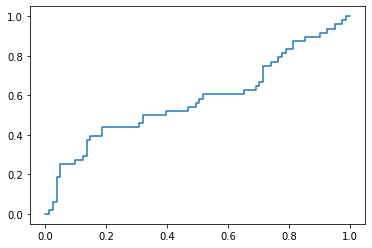

In [17]:
import matplotlib.pyplot as plt
from sklearn import metrics

probabilities=model.predict_proba(test[["gpa"]])
fpr,tpr,thresholds=metrics.roc_curve(test["actual_label"],probabilities[:,1])
plt.plot(fpr,tpr)
plt.show()

In [18]:
from sklearn.metrics import roc_auc_score
probabilities=model.predict_proba(test[["gpa"]])
auc_score=roc_auc_score(test["actual_label"],probabilities[:,1])
print(auc_score)

0.5779320987654322
